# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

# 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Attribute Information](#3.5_Attribute_information)
      * [3.5.1 Table 1. Cleveland dataset 14 features and descriptions.](#3.5.1_CDataset)
  * [3.6 Data Cleaning](#3.6_DataCleaning)
      * [3.6.1 Checking the Data types.](#3.6.1_CheckData)
      * [3.6.2 Replacing '?' values using 'ffill' meathod and datatype from 'object' to 'int'](#3.6.2_Replacing)
      * [3.6.3 Checking the rest of the Categorical features.](#3.6.3_CheckingCat)
      * [3.6.4 Checking the rest of the Continuous features.](#3.6.4_CheckkingCon)
  * [3.7 Explore The Data](#3.7_Explore_The_Data)
      * [3.7.1 Finding the correlation among attributes](#3.7.1_FCorrelation)
      * [3.7.2 Categorical Variables](#3.7.2_CatVar)
      * [3.7.3 Continous Variables](#3.7.3_ConVar)
      * [3.7.4 Scatter Plot](#3.7.4_ScatterPlot)
      * [3.7.5 Heatmap](#3.7.5_Heatmap)
      * [3.7.6 Bar Graph with or without Heart Desease](#3.7.6_BarGHD)
  * [3.8 Summary](#3.8_Summary)

# 3.2 Introduction<a id='3.2_Introduction'></a>

Predicting and diagnosing heart disease is the biggest challenge in the medical industry and relies on factors such as the physical examination, symptoms and signs of the patient.

Factors that influence heart disease are body cholesterol levels, smoking habit and obesity, family history of illnesses, blood pressure, and work environment. Machine learning algorithms play an essential and precise role in the prediction of heart disease.

Advances in technology allow machine language to combine with Big Data tools to manage unstructured and exponentially growing data. Heart disease is seen as the world’s deadliest disease of human life. In particular, in this type of disease, the heart is not able to push the required amount of blood to the remaining organs of the human body to perform regular functions.

Heart disease can be predicted based on various symptoms such as age, gender, heart rate, etc. and reduces the death rate of heart patients.

Due to the increasing use of technology and data collection, we can now predict heart disease using machine learning algorithms. Now let’s go further with the task of heart disease prediction using machine learning with Python.

# 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
## Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
import pandas as pd

## Numpy
import numpy as np

## Misc
from string import ascii_letters
import warnings
import os 
import joblib
from time import time
from scipy import stats
import itertools
import subprocess
from library.sb_utils import save_file

# 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
#Get the current working directory of a process and print 
MyWorkingDir = os.getcwd()
print(MyWorkingDir)

/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Notebook


In [3]:
# load and read the Dataset Cleveland.csv on woking directory
# and fed into DataFrame or df
path = MyWorkingDir = '/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Data/Cleveland.csv'
df = pd.read_csv('/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Data/Cleveland.csv', header = None)

# 3.5 Attribute Information<a id='3.5_Attribute_information'></a>

Experiments with the Cleveland database have concentrated on simply attempting to distinguish the presence of Heart Disease from absence.

### Table 1. Cleveland dataset 14 features and descriptions.<a id='3.5.1_CDataset'></a>

| Features|Description|Values
|----|----|----|
|(age)            |Age in years|
|(sex)            |Sex|1 = Male
|    |            |0 = Female
|(cp)             |Chest Pain type
|     |           |
|     |           |1: asymptomatic
|     |           |2: atypical angina
|     |           |3: non-anginal pain
|     |           |4: typical angina
|     |           |
|(trestbps)       |Resting blood pressure (mm/hg)
|(chol)           |Serum cholesterol (mg/dl)
|(fbs)            |Fasting blood sugar > 120 mg/dl)  
|     |           |1 = True
|     |           |0 = False
|(restecg)        | Resting Electrocardiographic results
|     |           |0: normal
|      |          |1: having ST-T wave abnormality 
|      |          |2: showing probable
|(thalach)       | Maximum Heart Rate achieved
|(exang)         |Exercise induced angina 
|      |         |1 = Yes
|      |         |0 = No
|(oldpeak)       |ST depression induced by exercise relative to rest
|(slope)         |Slope of Peak Exercise ST Segment	
|      |         |1: Upsloping
|      |         |2: Flat
|      |         |3: Downsloping
|(ca)|	Number of Major Vessels colored by Fluoroscopy		
|||0= Zero fluroscopy colored Major Vessels
|||1= One fluroscopy colored Major Vessels
|||2= Two fluroscopy colored Major Vessels
|||3= Three fluroscopy colored Major Vessels
|(thal)          |Thalassemia
|||3 = Normal (Normal blood flow)
|||6 = Fixed defect (no blood flow in some part of the heart)
|||7 = Reversable defect (blood flow is observed but it is not normal)
|(num) |	Diagnosis
|||0 = No Heart Disease
|||>0 = with Heart Disease

# 3.6 Data Cleaning<a id='3.6_DataCleaning'></a>

Lets add our features to the data...

In [4]:
#Adding features to the dataset for more visual understanding.
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'num']

In [5]:
def ca_simplifier(ca):
    if '0' in ca.lower():
        return '0'
    elif '1' in ca.lower():
        return '1'
    elif '2' in ca.lower():
        return '2'
    elif '3' in ca.lower():
        return'3'
    else:
        return '?'

In [6]:
#1 getting all "ca' values in the column list
col_list = df['ca'].tolist()
print(col_list)

['0', '3', '2', '0', '0', '0', '2', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '2', '0', '0', '0', '0', '0', '2', '2', '0', '0', '0', '0', '0', '1', '1', '0', '3', '0', '2', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '3', '0', '1', '2', '0', '0', '0', '0', '0', '2', '2', '2', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '3', '0', '0', '1', '1', '2', '1', '0', '0', '0', '1', '1', '3', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '3', '1', '2', '3', '0', '0', '1', '0', '2', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '1', '0', '0', '0', '1', '1', '3', '0', '2', '2', '1', '0', '3', '0', '0', '2', '0', '?', '1', '0', '0', '1', '0', '0', '0', '2', '1', '3', '1', '1', '3', '0', '2', '2', '0', '0', '2', '0', '3', '1', '3', '0', '3', '?', '3', '0', '2', '1', '0', '0', '0',

### 3.6.1 Checking the Data types.<a id='3.6.1_CheckData'></a>

checking the data types, data characters mistakes, replacing missing values. 

In [7]:
#getting all distinct values in the list
df['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [8]:
df['ca'] = df['ca'].apply(ca_simplifier)

### 3.6.2 Replacing '?' values using 'ffill' meathod and datatype from 'object' to 'int'<a id='3.6.2_Replacing'></a>

In [9]:
sum(df['ca'].values=='?')
droplist=df.loc[df['ca']=='?'].index.tolist()
df.drop(droplist,axis=0,inplace=True)
df['ca']=df['ca'].astype(str).astype(float).astype(int)

In [10]:
sum(df['thal'].values=='?')
droplist=df.loc[df['thal']=='?'].index.tolist()
df.drop(droplist,axis=0,inplace=True)
df['thal']=df['thal'].astype(str).astype(float).astype(int)

In [11]:
df.ca.value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [12]:
df.thal.value_counts()

3    164
7    115
6     18
Name: thal, dtype: int64

In [13]:
df.replace("?",np.nan, inplace = True)
df = df.fillna(method='ffill')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [14]:
#1 getting all "ca' values in the column list
col_list = df['ca'].tolist()
print(col_list)

[0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 2, 3, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 1, 3, 0, 2, 2, 1, 0, 3, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 3, 1, 1, 3, 0, 2, 2, 0, 0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1]


In [15]:
#getting all distinct values in the list
df['num'].unique()

array([0, 2, 1, 3, 4])

In [16]:
# Change num values > 0 to 1 for a Diagnosis to get our data ready for the next steps.
df['num'] = np.where((df['num']>0),1,0)

In [17]:
#getting all distinct values in the list
df['num'].unique()

array([0, 1])

### 3.6.3 Checking the rest of the Categorical features.<a id='3.6.3_CheckingCat'></a>

In [18]:
#getting all distinct values in the list
df['cp'].unique()

array([1, 4, 3, 2])

In [19]:
#getting all distinct values in the list
df['restecg'].unique()

array([2, 0, 1])

In [20]:
#getting all distinct values in the list
df['exang'].unique()

array([0, 1])

In [21]:
#getting all distinct values in the list
df['slope'].unique()

array([3, 2, 1])

In [22]:
#getting all distinct values in the list
df['ca'].unique()

array([0, 3, 2, 1])

In [23]:
#getting all distinct values in the list
df['thal'].unique()

array([6, 3, 7])

### 3.6.4 Checking the rest of the Continuous features.<a id='3.6.4_ChwckingCon'></a>

In [24]:
#getting all distinct values in the list
df['trestbps'].unique()

array([145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105,
       124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115,
       118, 100, 200,  94, 165, 102, 152, 101, 126, 174, 148, 178, 158,
       192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164])

In [25]:
#getting all distinct values in the list
df['chol'].unique()

array([233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256,
       263, 199, 168, 239, 275, 266, 211, 283, 284, 224, 206, 219, 340,
       226, 247, 167, 230, 335, 234, 177, 276, 353, 243, 225, 302, 212,
       330, 175, 417, 197, 198, 290, 253, 172, 273, 213, 305, 216, 304,
       188, 282, 185, 232, 326, 231, 269, 267, 248, 360, 258, 308, 245,
       270, 208, 264, 321, 274, 325, 235, 257, 164, 141, 252, 255, 201,
       222, 260, 182, 303, 265, 309, 307, 249, 186, 341, 183, 407, 217,
       288, 220, 209, 227, 261, 174, 281, 221, 205, 240, 289, 318, 298,
       564, 246, 322, 299, 300, 293, 277, 214, 207, 160, 394, 184, 315,
       409, 244, 195, 196, 126, 313, 259, 200, 262, 215, 228, 193, 271,
       210, 327, 149, 295, 306, 178, 237, 218, 223, 242, 319, 166, 180,
       311, 278, 342, 169, 187, 157, 176, 241, 131])

In [26]:
#getting all distinct values in the list
df['thalach'].unique()

array([150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142,
       173, 162, 174, 168, 139, 171, 144, 132, 158, 114, 151, 161, 179,
       120, 112, 137, 157, 169, 165, 123, 128, 152, 140, 188, 109, 125,
       131, 170, 113,  99, 177, 141, 180, 111, 143, 182, 156, 149, 145,
       146, 175, 186, 185, 159, 130, 190, 136,  97, 127, 154, 133, 126,
       202, 103, 166, 164, 184, 124, 122,  96, 138,  88, 105, 194, 195,
       106, 115, 167,  95, 192, 117, 121, 116,  71, 118, 181, 134,  90])

In [27]:
#getting all distinct values in the list
df['oldpeak'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

# 3.7 Exploring the Data<a id='3.7_Explore_The_Data'></a>

### 3.7.1 Finding the Correlation Among Attributes<a id='3.7.1_FCorrelation'></a>

Before training we need to observe and analyse the data to see what we are going to work with. The goal here is to learn more about the data and become a topic export on the dataset you are working with.

Let's now move on to exploratory data analysis:

In [28]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,3.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,1.60,0.68,4.73,0.46
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,1.94,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,1.00


Basically, with df.describe(), we should check on the min and max value for the categorical variables (min-max). We should also observe the mean, std, 25% and 75% on the continuous variables.

In [29]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### 3.7.2 Categorical Variables<a id='3.7.2_CatVar'></a>

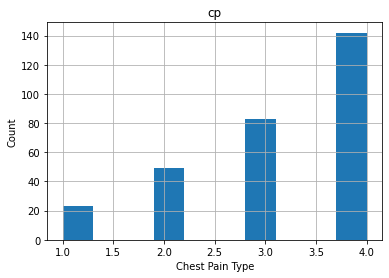

<AxesSubplot:>

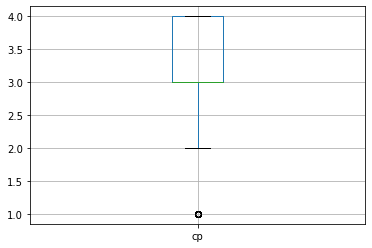

In [30]:
df.cp.hist()
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('cp')
plt.show()
df.boxplot(column = 'cp')

1. 'cp' {Chest pain}: People with cp 2, 3, 4 are more likely to have heart disease than people with cp 1.

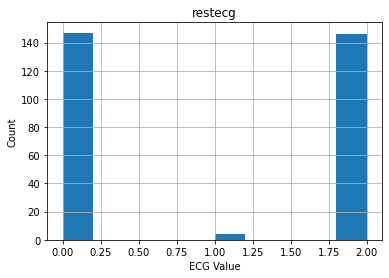

<AxesSubplot:>

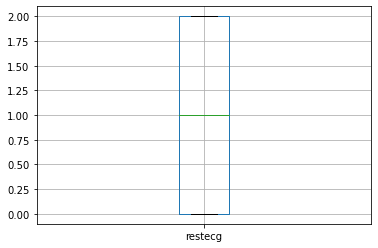

In [31]:
df.restecg.hist()
plt.xlabel('ECG Value')
plt.ylabel('Count')
plt.title('restecg')
plt.show()
df.boxplot(column = 'restecg')

2. 'restecg' {resting EKG results}: People with a value of 1 having ST-T wave abnormality and with value 2 showing probable or definite left ventricular hypertrophy by Estes' criteria , reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems are more likely to have heart disease.

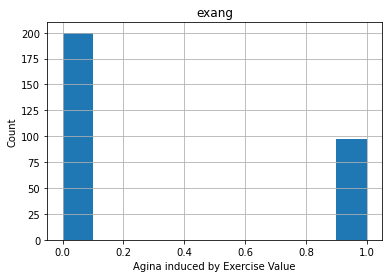

<AxesSubplot:>

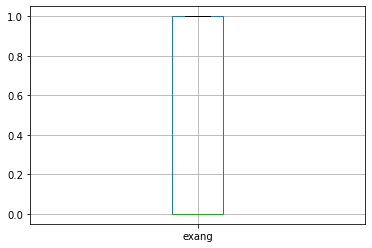

In [32]:
df.exang.hist()
plt.xlabel('Agina induced by Exercise Value')
plt.ylabel('Count')
plt.title('exang')
plt.show()
df.boxplot(column = 'exang')

3. 'exang' {exercise-induced angina}: people with a value of 0 (angina induced by exercise) have more heart disease than people with a value of 1 (angina induced by exercise)

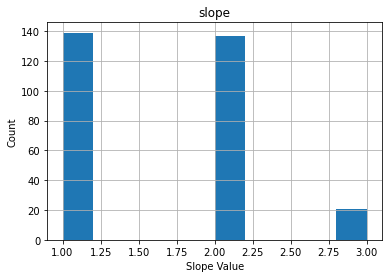

<AxesSubplot:>

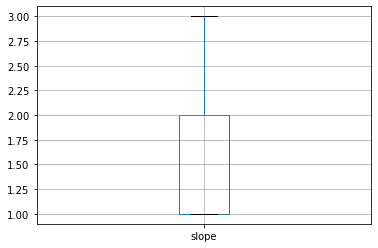

In [33]:
df.slope.hist()
plt.xlabel('Slope Value')
plt.ylabel('Count')
plt.title('slope')
plt.show()
df.boxplot(column = 'slope')

4. 'slope' {the slope of the ST segment of peak exercise}: People with a slope value of 3 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 1 slope (Upsloping: best heart rate with exercise) or 2 (Flat sloping: minimal change (typical healthy heart)).

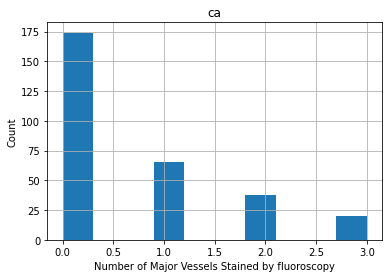

<AxesSubplot:>

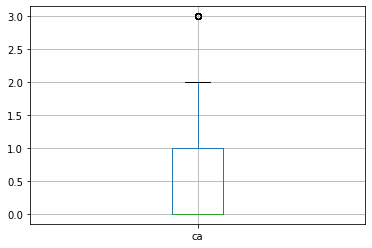

In [34]:
df.ca.hist()
plt.xlabel('Number of Major Vessels Stained by fluoroscopy')
plt.ylabel('Count')
plt.title('ca')
plt.show()
df.boxplot(column = 'ca')

5. 'ca' {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with 'ca' equal to 1 are more likely to have heart disease.

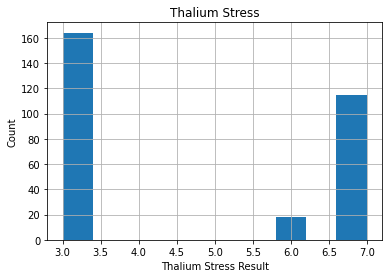

<AxesSubplot:>

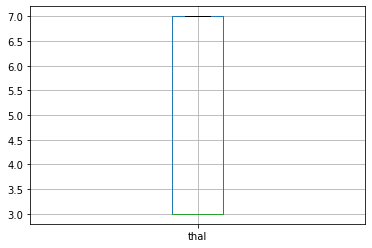

In [35]:
df.thal.hist()
plt.xlabel('Thalium Stress Result')
plt.ylabel('Count')
plt.title('Thalium Stress')
plt.show()
df.boxplot(column = 'thal')

6. 'thal' {thalium stress result}: People with a thal value of 3 with no blood flow in some part of the heart are more likely to have heart disease.

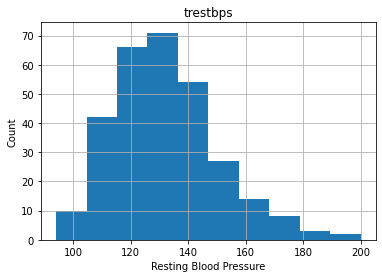

<AxesSubplot:>

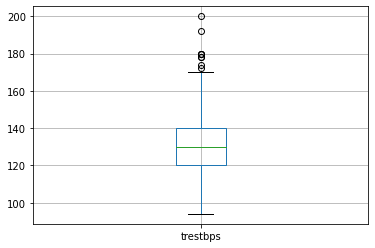

In [36]:
df.trestbps.hist()
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.title('trestbps')
plt.show()
df.boxplot(column = 'trestbps')

1. 'trestbps': resting blood pressure anything above 130-140 is generally of concern

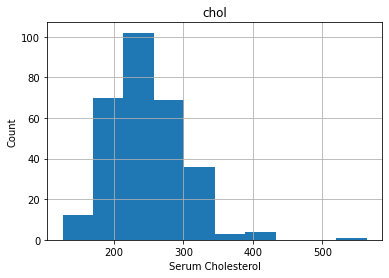

<AxesSubplot:>

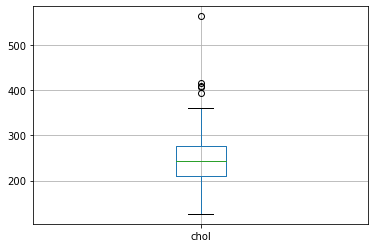

In [37]:
df.chol.hist()
plt.xlabel('Serum Cholesterol')
plt.ylabel('Count')
plt.title('chol')
plt.show()
df.boxplot(column = 'chol')

### 3.7.3 Continous Variable<a id='3.7.3_ConVar'></a>

2. 'chol': greater than 200 is of concern.

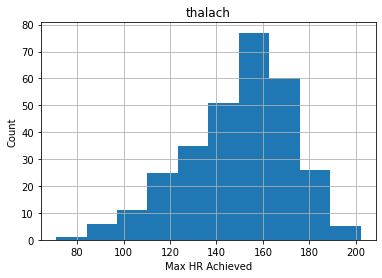

<AxesSubplot:>

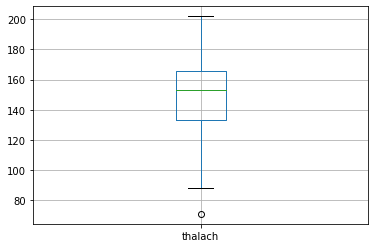

In [38]:
df.thalach.hist()
plt.xlabel('Max HR Achieved')
plt.ylabel('Count')
plt.title('thalach')
plt.show()
df.boxplot(column = 'thalach')

3. 'thalach': People with a maximum of over 140 are more likely to have heart disease.


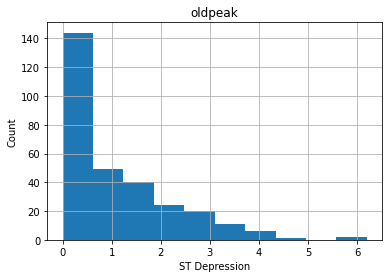

<AxesSubplot:>

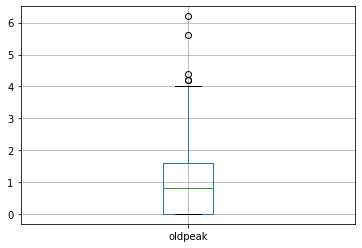

In [39]:
df.oldpeak.hist()
plt.xlabel('ST Depression')
plt.ylabel('Count')
plt.title('oldpeak')
plt.show()
df.boxplot(column = 'oldpeak')

4.  'oldpeak' of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

### 3.7.4 Scatter Plot<a id='3.7.4_ScatterPlot'></a>

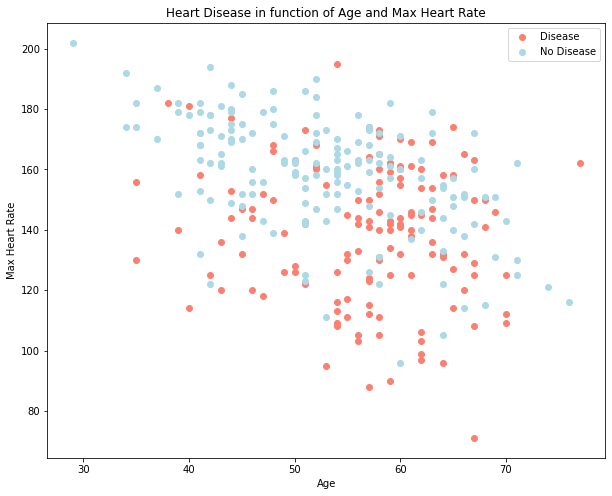

In [40]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.num==1],
            df.thalach[df.num==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.num==0],
            df.thalach[df.num==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

'Maximum Heart Rate' versus 'Age' showed 50 years of age and higher is mostly have heart desease.

### 3.7.5 Heatmap<a id='3.7.5_Heatmap'></a>

<AxesSubplot:>

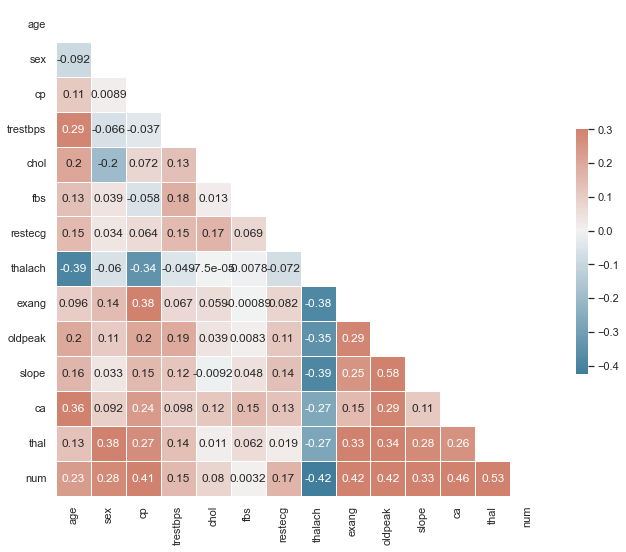

In [41]:
# Let's make our correlation matrix a little prettier with Half Heatmap
sns.set_theme(style='white')

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

between 'oldpeak' and 'slope has are highly positively correlated. Our target 'num' is mostly correlated to all our features except 'num' and 'thalach' with a negatively correlation.

### 3.7.6 Bar Graph with or without Heart Desease<a id='3.7.6_BarGHD'></a>

<AxesSubplot:xlabel='With Heart Disease              Without Heart Disease', ylabel='Age'>

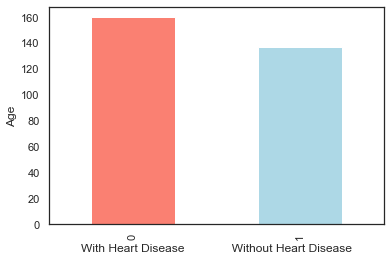

In [42]:
df.num.value_counts().plot(ylabel='Age', xlabel='With Heart Disease              Without Heart Disease', kind="bar", color=["salmon", "lightblue"])

We have 160 people with heart disease and 138 people without heart disease, so our problem is balanced.

<AxesSubplot:title={'center':'Correlation with target'}>

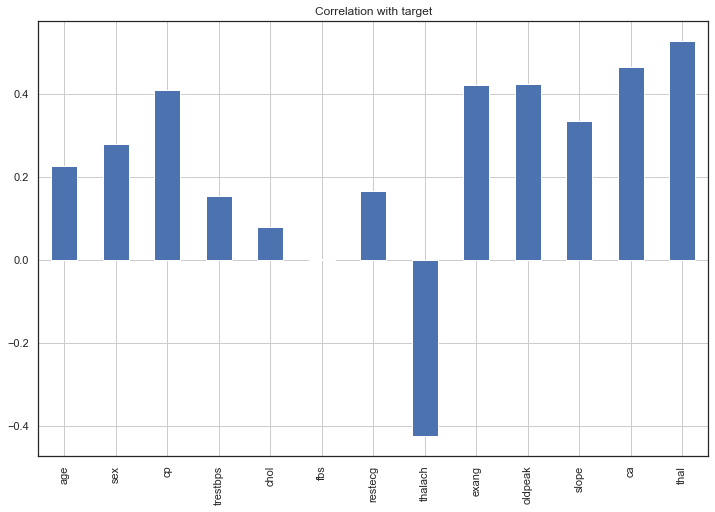

In [43]:
df.drop('num', axis=1).corrwith(df.num).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

1. 'fbs' and 'chol' are the least correlated with the target variable.
2. All other features have a significant correlation with the target variable, except 'thalach'

# 3.8 Summary<a id='3.8_Summary'></a>

Features datatype was checked and 'ca' and 'thal' missing features was replace and datatype was change from object to integer.
Exploration of the data indicated that patients 'oldpeak' and 'slope has are highly positively correlated. Our target 'num' is mostly correlated to all our features except 'num' and 'thalach' with a negatively correlation.